# Mobile Price Classification Using Bagging Classifier

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [2]:
# Reading the dataset
data_set = pd.read_csv('train.csv')
data_set.shape

(2000, 21)

In [4]:
# Checking for null values in the dataset
data_set.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [3]:
# Separating the input features and target variable
X = data_set.iloc[:, :-1]
y = data_set['price_range']

In [5]:
# Splitting the dataset into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape

((1600, 20), (400, 20))

In [6]:
# Scaling the features in the training and test sets
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Finding the Best Parameters Using Halving Grid Search

In [7]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

In [8]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

base_estimator = DecisionTreeClassifier(random_state=0)
model = BaggingClassifier(estimator=base_estimator, random_state=0)

In [9]:
# Defining the parameter grid
param_grid = {
    'n_estimators': [10, 20, 30, 40, 50, 100],
    'max_samples': [0.25, 0.5, 0.75, 1.0, 2.0],
    'max_features': [0.25, 0.5, 0.75, 1.0, 2.0],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False]
}

In [10]:
halving_search = HalvingGridSearchCV(estimator=model,
                                     param_grid=param_grid,
                                     cv=5,
                                     factor=3,  
                                     n_jobs=-1,
                                     verbose=3)

halving_search.fit(X_train, y_train)

n_iterations: 4
n_required_iterations: 6
n_possible_iterations: 4
min_resources_: 40
max_resources_: 1600
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 600
n_resources: 40
Fitting 5 folds for each of 600 candidates, totalling 3000 fits


d:\Python\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
1080 fits failed out of a total of 3000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
480 fits failed with the following error:
Traceback (most recent call last):
  File "d:\Python\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\Python\Lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^
  File "d:\Python\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "d:\Python\Lib\site-packages\sklearn\base.py", line 436, in _validate_par

----------
iter: 1
n_candidates: 200
n_resources: 120
Fitting 5 folds for each of 200 candidates, totalling 1000 fits


d:\Python\Lib\site-packages\sklearn\model_selection\_search.py:1107: UserWarning: One or more of the test scores are non-finite: [0.25       0.45       0.45       0.6        0.525      0.55
 0.4        0.425      0.475      0.65       0.525      0.625
 0.25       0.5        0.55       0.8        0.625      0.625
 0.3        0.45       0.45       0.675      0.55       0.675
        nan        nan        nan        nan        nan        nan
 0.65       0.575      0.5        0.625      0.65       0.725
 0.75       0.75       0.7        0.75       0.8        0.8
 0.6        0.725      0.725      0.825      0.725      0.8
 0.775      0.8        0.825      0.825      0.825      0.85
        nan        nan        nan        nan        nan        nan
 0.575      0.6        0.6        0.675      0.65       0.65
 0.675      0.675      0.75       0.775      0.75       0.825
 0.825      0.8        0.8        0.875      0.875      0.875
 0.775      0.825      0.875      0.9        0.85       0.875


----------
iter: 2
n_candidates: 67
n_resources: 360
Fitting 5 folds for each of 67 candidates, totalling 335 fits


d:\Python\Lib\site-packages\sklearn\model_selection\_search.py:1107: UserWarning: One or more of the test scores are non-finite: [0.25       0.45       0.45       0.6        0.525      0.55
 0.4        0.425      0.475      0.65       0.525      0.625
 0.25       0.5        0.55       0.8        0.625      0.625
 0.3        0.45       0.45       0.675      0.55       0.675
        nan        nan        nan        nan        nan        nan
 0.65       0.575      0.5        0.625      0.65       0.725
 0.75       0.75       0.7        0.75       0.8        0.8
 0.6        0.725      0.725      0.825      0.725      0.8
 0.775      0.8        0.825      0.825      0.825      0.85
        nan        nan        nan        nan        nan        nan
 0.575      0.6        0.6        0.675      0.65       0.65
 0.675      0.675      0.75       0.775      0.75       0.825
 0.825      0.8        0.8        0.875      0.875      0.875
 0.775      0.825      0.875      0.9        0.85       0.875


----------
iter: 3
n_candidates: 23
n_resources: 1080
Fitting 5 folds for each of 23 candidates, totalling 115 fits


d:\Python\Lib\site-packages\sklearn\model_selection\_search.py:1107: UserWarning: One or more of the test scores are non-finite: [0.25       0.45       0.45       0.6        0.525      0.55
 0.4        0.425      0.475      0.65       0.525      0.625
 0.25       0.5        0.55       0.8        0.625      0.625
 0.3        0.45       0.45       0.675      0.55       0.675
        nan        nan        nan        nan        nan        nan
 0.65       0.575      0.5        0.625      0.65       0.725
 0.75       0.75       0.7        0.75       0.8        0.8
 0.6        0.725      0.725      0.825      0.725      0.8
 0.775      0.8        0.825      0.825      0.825      0.85
        nan        nan        nan        nan        nan        nan
 0.575      0.6        0.6        0.675      0.65       0.65
 0.675      0.675      0.75       0.775      0.75       0.825
 0.825      0.8        0.8        0.875      0.875      0.875
 0.775      0.825      0.875      0.9        0.85       0.875


HalvingGridSearchCV(estimator=BaggingClassifier(estimator=DecisionTreeClassifier(random_state=0),
                                                random_state=0),
                    n_jobs=-1,
                    param_grid={'bootstrap': [True, False],
                                'bootstrap_features': [True, False],
                                'max_features': [0.25, 0.5, 0.75, 1.0, 2.0],
                                'max_samples': [0.25, 0.5, 0.75, 1.0, 2.0],
                                'n_estimators': [10, 20, 30, 40, 50, 100]},
                    verbose=3)

In [11]:
# Best parameters found by HalvingGridSearchCV
print('Best score:',halving_search.best_score_)
print('Best parameters found:',halving_search.best_params_)

Best score: 0.887962962962963
Best parameters found: {'bootstrap': True, 'bootstrap_features': False, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 50}


### Visualizing the Results

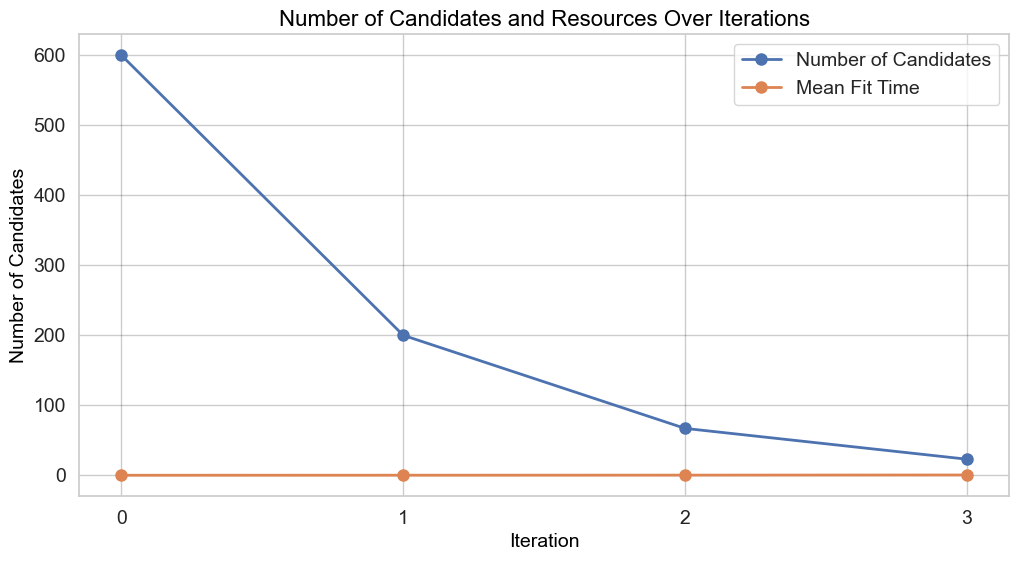

In [12]:
results = pd.DataFrame(halving_search.cv_results_)

iterations = results['iter'].values
n_candidates = results.groupby('iter').size()
mean_fit_time = results.groupby('iter')['mean_fit_time'].mean()

# Visualizing the number of candidates and resources over iterations
plt.figure(figsize=(12, 6))
plt.plot(n_candidates.index, n_candidates.values, marker='o', label='Number of Candidates', linewidth=2, markersize=8) # type: ignore
plt.plot(mean_fit_time.index, mean_fit_time.values, marker='o', label='Mean Fit Time', linewidth=2, markersize=8) # type: ignore
plt.xlabel('Iteration', color='black', fontsize=14)
plt.ylabel('Number of Candidates', color='black', fontsize=14)
plt.title('Number of Candidates and Resources Over Iterations', color='black', fontsize=16)
plt.legend(fontsize=14, ncol=1, loc="upper right")
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xticks(ticks=n_candidates.index)
plt.grid(True, linewidth=1, color='black', alpha=0.2)
plt.show()

In [13]:
sorted_indices = np.argsort(results['mean_test_score'])[::-1]
sorted_scores = results['mean_test_score'].values[sorted_indices]
sorted_params = results['params'].values[sorted_indices]

top_params = [str(params) for params in sorted_params[:10]]
top_scores = [str(sc) for sc in sorted_scores[:10]]
param_lb = []
for i in range(1,11):
    param_lb.append('Parameter Combination ' + str(i))

print('Top 10 Parameter Combinations:')
for i in range(len(top_params)):
    print('Parmeter Combination',i+1)
    print(top_params[i])
    print('Score:',top_scores[i])
    print()

Top 10 Parameter Combinations:
Parmeter Combination 1
{'bootstrap': False, 'bootstrap_features': True, 'max_features': 0.5, 'max_samples': 0.75, 'n_estimators': 10}
Score: 0.85

Parmeter Combination 2
{'bootstrap': True, 'bootstrap_features': False, 'max_features': 2.0, 'max_samples': 0.75, 'n_estimators': 50}
Score: nan

Parmeter Combination 3
{'bootstrap': True, 'bootstrap_features': False, 'max_features': 2.0, 'max_samples': 0.5, 'n_estimators': 10}
Score: nan

Parmeter Combination 4
{'bootstrap': True, 'bootstrap_features': False, 'max_features': 2.0, 'max_samples': 0.25, 'n_estimators': 50}
Score: nan

Parmeter Combination 5
{'bootstrap': True, 'bootstrap_features': True, 'max_features': 0.75, 'max_samples': 0.5, 'n_estimators': 40}
Score: 0.775

Parmeter Combination 6
{'bootstrap': True, 'bootstrap_features': True, 'max_features': 0.5, 'max_samples': 1.0, 'n_estimators': 20}
Score: 0.7166666666666666

Parmeter Combination 7
{'bootstrap': True, 'bootstrap_features': True, 'max_fea

d:\Python\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: The behavior of Series.argsort in the presence of NA values is deprecated. In a future version, NA values will be ordered last instead of set to -1.
  return bound(*args, **kwds)


## Designing the Bagging Classifier Model with the Optimal Hyperparameters

In [14]:
best_bag_clf = halving_search.best_estimator_

# Making predictions with the best estimator
y_train_pred = best_bag_clf.predict(X_train) # type: ignore
y_test_pred = best_bag_clf.predict(X_test) # type: ignore

In [15]:
# Computing the performance metrics for the training subset
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1 = f1_score(y_train, y_train_pred, average='weighted')

print("Training Accuracy (in %):",round(train_accuracy*100,3))
print("Training Precision (in %):",round(train_precision*100,3)) # type: ignore
print("Training Recall (in %):",round(train_recall*100,3)) # type: ignore
print("Training F1 Score (in %):",round(train_f1*100,3)) # type: ignore

Training Accuracy (in %): 100.0
Training Precision (in %): 100.0
Training Recall (in %): 100.0
Training F1 Score (in %): 100.0


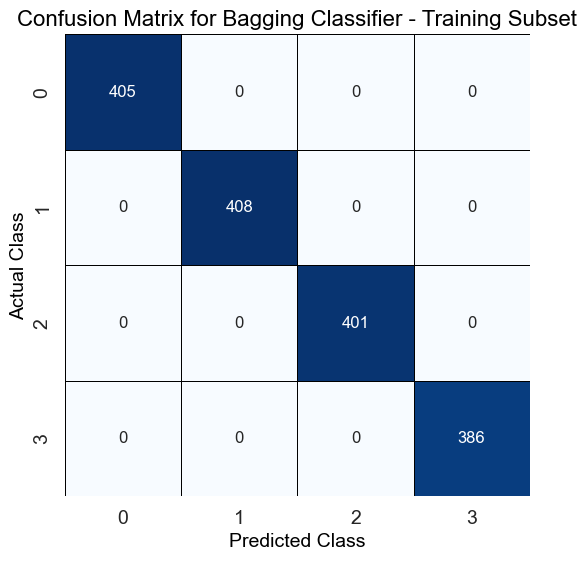

In [16]:
conf_mat_train = confusion_matrix(y_train,y_train_pred)

plt.figure(figsize=(6,6))
sns.heatmap(conf_mat_train, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black',
            xticklabels=best_bag_clf.classes_, yticklabels=best_bag_clf.classes_, annot_kws={"size": 12}) # type: ignore
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.title('Confusion Matrix for Bagging Classifier - Training Subset', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

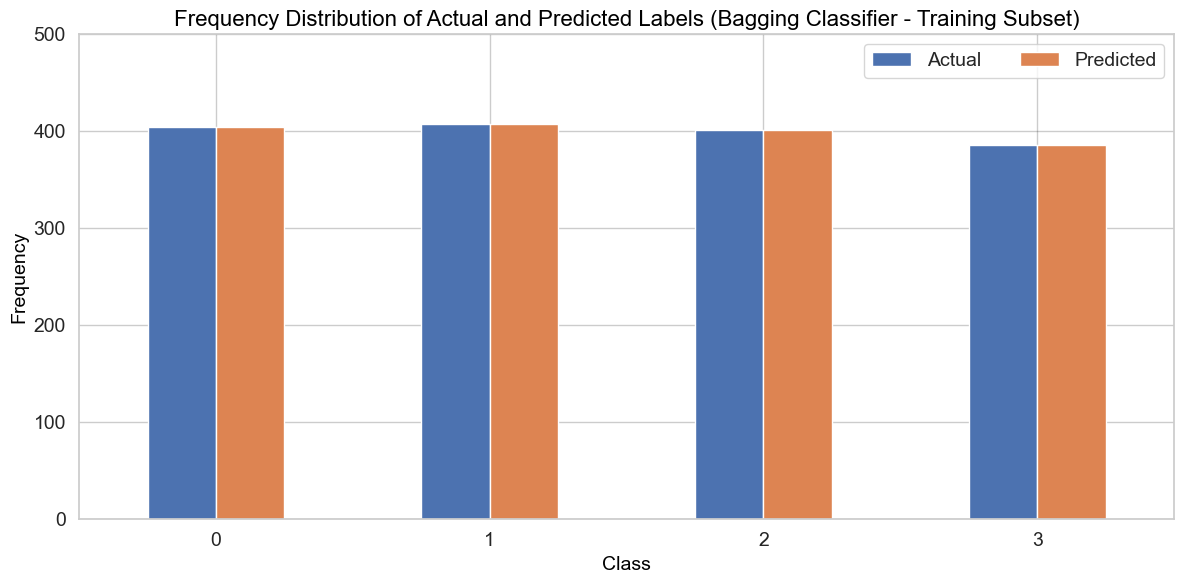

In [17]:
# Plotting the bar graph for frequency distribution of actual and predicted labels (Test Subset)
actual_labels_train, actual_counts_train = np.unique(y_train, return_counts=True)
predicted_labels_train, predicted_counts_train = np.unique(y_train_pred, return_counts=True)

labels_train = np.unique(y_train)

x_train = np.arange(len(labels_train))
width = 0.25

fig, ax = plt.subplots(figsize=(12,6))
rects1_train = ax.bar(x_train - width/2, actual_counts_train, width, label='Actual')
rects2_train = ax.bar(x_train + width/2, predicted_counts_train, width, label='Predicted')

ax.set_xlabel('Class', color='black', fontsize=14)
ax.set_ylabel('Frequency', color='black', fontsize=14)
ax.set_title('Frequency Distribution of Actual and Predicted Labels (Bagging Classifier - Training Subset)', color='black', fontsize=16)
ax.set_xticks(x_train)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(fontsize=14, ncol=2, loc="upper right")
plt.grid(True, linewidth=1, color='black', alpha=0.2)

ax.set_xlim([-0.5, len(labels_train) - 0.5]) # type: ignore
ax.set_ylim([0,500]) # type: ignore
fig.tight_layout()
plt.show()

In [18]:
# Computing the performance metrics for the test subset
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

print("Test Accuracy (in %):",round(test_accuracy*100,3))
print("Test Precision (in %):",round(test_precision*100,3)) # type: ignore
print("Test Recall (in %):",round(test_recall*100,3)) # type: ignore
print("Test F1 Score (in %):",round(test_f1*100,3)) # type: ignore

Test Accuracy (in %): 89.75
Test Precision (in %): 89.809
Test Recall (in %): 89.75
Test F1 Score (in %): 89.771


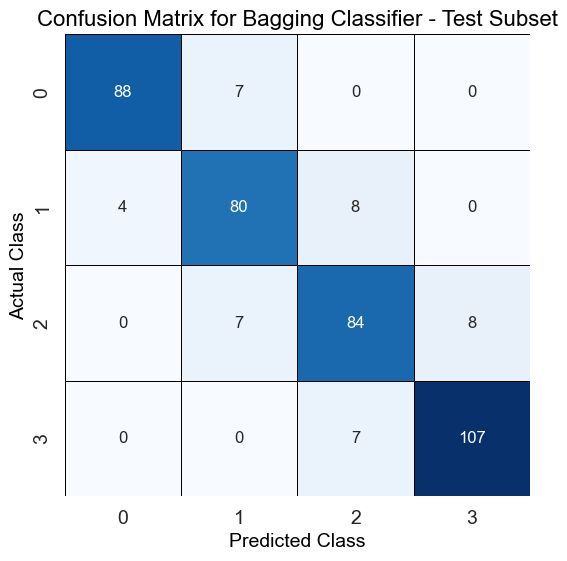

In [19]:
conf_mat_test = confusion_matrix(y_test,y_test_pred)

plt.figure(figsize=(6,6))
sns.heatmap(conf_mat_test, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black',
            xticklabels=best_bag_clf.classes_, yticklabels=best_bag_clf.classes_, annot_kws={"size": 12}) # type: ignore
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.title('Confusion Matrix for Bagging Classifier - Test Subset', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

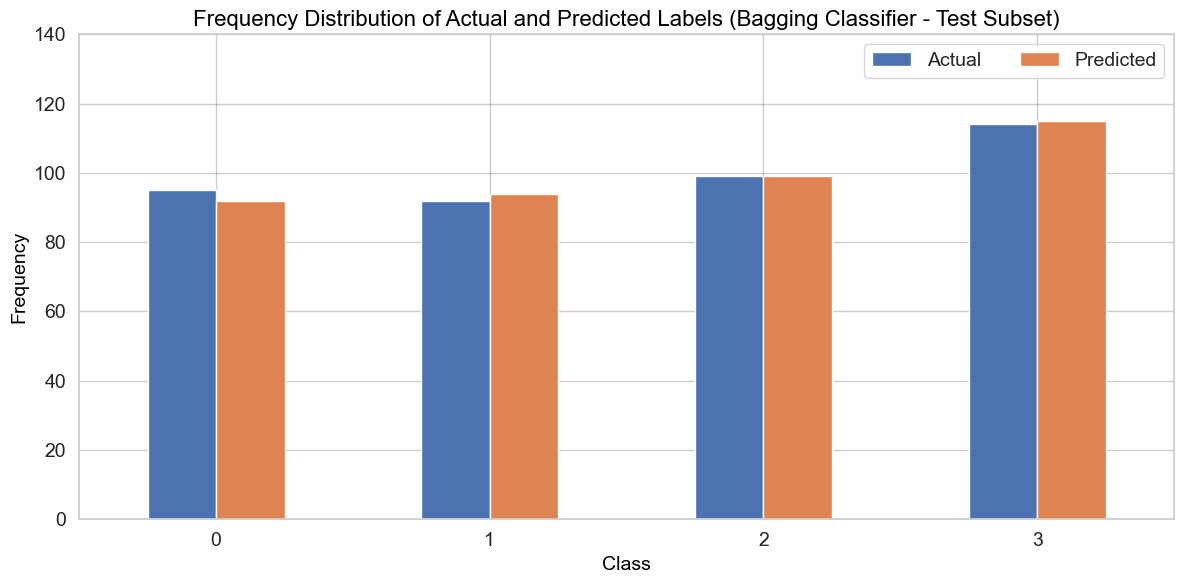

In [20]:
# Plotting the bar graph for frequency distribution of actual and predicted labels (Test Subset)
actual_labels_test, actual_counts_test = np.unique(y_test, return_counts=True)
predicted_labels_test, predicted_counts_test = np.unique(y_test_pred, return_counts=True)

labels_test = np.unique(y_test)

x_test = np.arange(len(labels_test))
width = 0.25

fig, ax = plt.subplots(figsize=(12,6))
rects1_test = ax.bar(x_test - width/2, actual_counts_test, width, label='Actual')
rects2_test = ax.bar(x_test + width/2, predicted_counts_test, width, label='Predicted')

ax.set_xlabel('Class', color='black', fontsize=14)
ax.set_ylabel('Frequency', color='black', fontsize=14)
ax.set_title('Frequency Distribution of Actual and Predicted Labels (Bagging Classifier - Test Subset)', color='black', fontsize=16)
ax.set_xticks(x_test)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(fontsize=14, ncol=2, loc="upper right")
plt.grid(True, linewidth=1, color='black', alpha=0.2)

ax.set_xlim([-0.5, len(labels_test) - 0.5]) # type: ignore
ax.set_ylim([0,140]) # type: ignore
fig.tight_layout()
plt.show()

***